In [1]:
# Kutubxonalarni import qilish
import pandas as pd                          # Ma'lumotlarni o'qish va tahlil qilish uchun
import matplotlib.pyplot as plt              # Grafiklar chizish uchun
from sklearn.model_selection import train_test_split  # Ma'lumotni train/testga bo'lish
from sklearn.preprocessing import StandardScaler       # Scaling uchun
from sklearn.svm import SVC                           # Support Vector Classification modeli
from sklearn.metrics import classification_report, confusion_matrix  # Baholash

In [3]:
# CSV faylni o‘qish
df = pd.read_csv("C:/Users/user/Desktop/Data.csv")

In [5]:
# Mustaqil va maqsad ustunlarni ajratamiz
X = df.drop('Class', axis=1)   # Barcha ustunlar, lekin 'Class' emas (xususiyatlar)
y = df['Class']                # Faqat 'Class' ustuni (nishon)

In [11]:
# Ma'lumotni o'qitish va test to'plamlariga ajratamiz
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [9]:
# Ma'lumotlarni standartlashtirish (0 atrofida markazlashtirish)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# SVM klassifikatorni yaratamiz (RBF kernel asosida)
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train_scaled, y_train)  # Modelni o‘qitamiz

SVC()

In [15]:
# Model yordamida bashorat qilish
y_pred = svm_model.predict(X_test_scaled)

In [17]:
# Baholash: Confusion Matrix va Classification Report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[76  3]
 [ 3 55]]


In [19]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           2       0.96      0.96      0.96        79
           4       0.95      0.95      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137



In [21]:
# Faqat 2 ustun bilan SVM chizmali ko‘rinishi
import numpy as np

# Faqat 2 ustun tanlab olinadi
X_vis = df[['Clump Thickness', 'Uniformity of Cell Size']]
y_vis = df['Class']

In [23]:
# Skalering
X_scaled_vis = StandardScaler().fit_transform(X_vis)

In [25]:
# SVM modeli
svm_vis = SVC(kernel='linear')  # Chizmada to‘g‘ri chiziqli ko‘rinish uchun
svm_vis.fit(X_scaled_vis, y_vis)

SVC(kernel='linear')

In [27]:
# Meshgrid yaratish (grafik uchun)
x_min, x_max = X_scaled_vis[:, 0].min() - 1, X_scaled_vis[:, 0].max() + 1
y_min, y_max = X_scaled_vis[:, 1].min() - 1, X_scaled_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

In [29]:
# Har nuqtada bashorat qilish
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

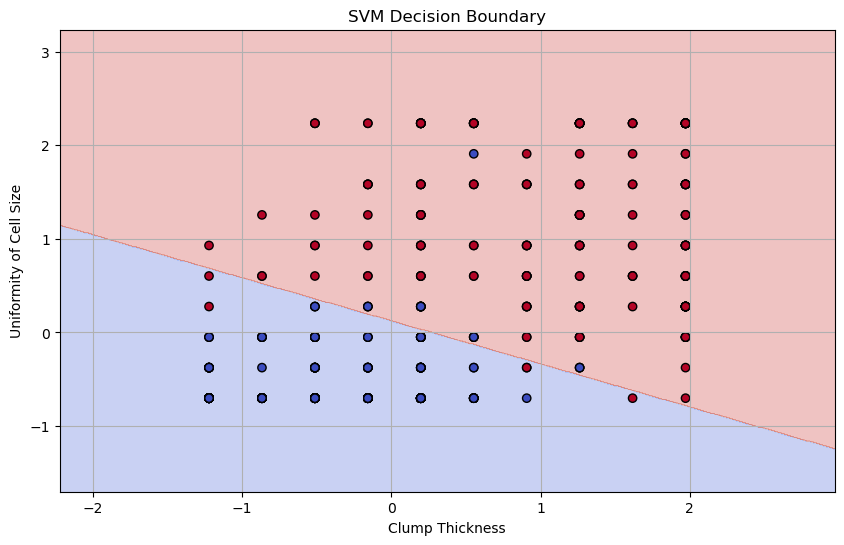

In [31]:
# Chizish
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X_scaled_vis[:, 0], X_scaled_vis[:, 1], c=y_vis, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Clump Thickness')
plt.ylabel('Uniformity of Cell Size')
plt.title('SVM Decision Boundary')
plt.grid(True)
plt.show()